<a href="https://colab.research.google.com/github/profsuccodifrutta/patch_core_brain_mri/blob/main/patch_core_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_path = '/content/drive/MyDrive/brainmri.zip'
extract_path = '/content/brain_dataset' # Cartella locale di Colab

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Estrazione completata!")

✅ Estrazione completata!


In [ ]:
!pip install anomalib
!pip install faiss-cpu

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.8/851.8 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 127.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.5/760.5 kB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 55.8 MB/s eta 0:00:00
  Created wheel for freia: filename=FrEIA-0.2-py3-none-any.whl size=42763 sha256=d668821c27461bcff01396c601cabbc0c3ecf0423e5518b60667c33006da2386
  Stored in 

In [15]:
import torch
from pathlib import Path
from anomalib.data import Folder
from anomalib.models import Patchcore
from anomalib.engine import Engine


DATA_PATH = Path('/content/brain_dataset')

datamodule = Folder(
    name="brain_mri",
    root=DATA_PATH,
    normal_dir="Training/notumor",      # Sani per il training
    normal_test_dir="Testing/notumor",  # Sani per il test
    abnormal_dir="Testing",             # Tutte le altre cartelle in Testing sono anomalie
    train_batch_size=8,
    eval_batch_size=8,
    num_workers=2
)
datamodule.setup()

print("✅ Configurazione completata. Pronto per l'estrazione delle feature.")

✅ Configurazione completata. Pronto per l'estrazione delle feature.


In [ ]:
# PatchCore
model = Patchcore(
    backbone="resnet18",    #"wide_resnet50_2"
    layers=["layer2", "layer3"],
    coreset_sampling_ratio=0.01
)


engine = Engine(
    max_epochs=1,
    devices=1,
    accelerator="auto",
    enable_progress_bar=False
)

# Crea la memoria dei sani (Training)
print(" Avvio estrazione feature e creazione Memory Bank...")

engine.fit(model=model, datamodule=datamodule)

print(" Memory Bank creata con successo!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores


 Avvio estrazione feature e creazione Memory Bank...


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/optimizer.py:183: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │  2.8 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 2.8 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 2.8 M                                                                                                
Total estimated model params size (MB): 11                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 69                                                                                           
Total FLOPs: 0

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/loops/fit_loop.py:534: Found 69 module(s) in eval mode at the start of training. This may lead to unexpected behavior during training. If this is intentional, you can ignore this warning.
Selecting Coreset Indices.: 100%|██████████| 16332/16332 [07:50<00:00, 34.75it/s]
INFO:lightning_fabric.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


 Memory Bank creata con successo!


In [ ]:
#  Confronta i malati con la memoria (Inference)
print(" Valutazione sulle anomalie...")
results = engine.test(model=model, datamodule=datamodule)

print("\n--- RISULTATI FINALI ---")
print(results)

INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


 Valutazione sulle anomalie...


/usr/local/lib/python3.12/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: The ``compute`` method of metric AUROC was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: The ``compute`` method of metric F1Score was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.8428038358688354     │
│       image_F1Score       │    0.8638184070587158     │
└───────────────────────────┴───────────────────────────┘


--- RISULTATI FINALI ---
[{'image_AUROC': 0.8428038358688354, 'image_F1Score': 0.8638184070587158}]


In [18]:
# salva il modello
from anomalib.engine import Engine
path_salvataggio = "/content/drive/MyDrive/patchcore_modelresnet18.ckpt"
engine.trainer.save_checkpoint(path_salvataggio)
print(f"✅ Modello salvato correttamente in: {path_salvataggio}")

INFO: `weights_only` was not set, defaulting to `False`.
INFO:lightning.pytorch.trainer.connectors.checkpoint_connector:`weights_only` was not set, defaulting to `False`.


✅ Modello salvato correttamente in: /content/drive/MyDrive/patchcore_modelresnet18.ckpt


In [22]:
from anomalib.models import Patchcore
from anomalib.engine import Engine
from anomalib.data import Folder

# inferenza senza dover ricreare la memory bank
# Inizializzi il modello
path_checkpoint = "/content/drive/MyDrive/patchcore_modelresnet18.ckpt"
model = Patchcore(backbone="resnet18", layers=["layer2", "layer3"])


engine = Engine(devices=1,enable_progress_bar=False )


predictions = engine.predict(model=model, datamodule=datamodule, ckpt_path=path_checkpoint)

INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/patchcore_modelresnet18.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/patchcore_modelresnet18.ckpt


🎲 Mostro 3 immagini casuali...


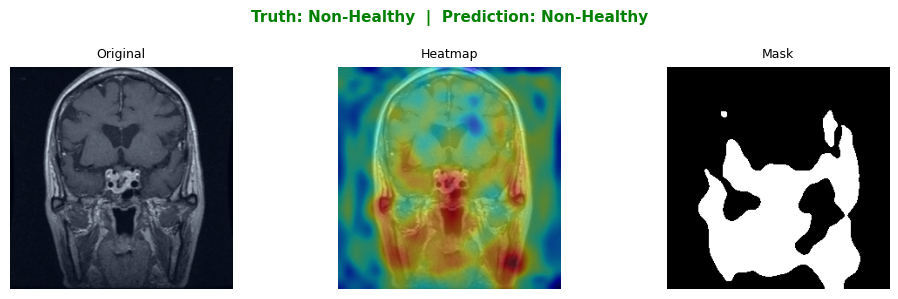

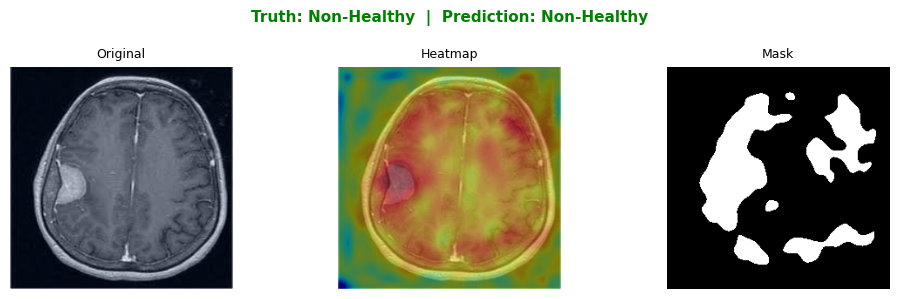

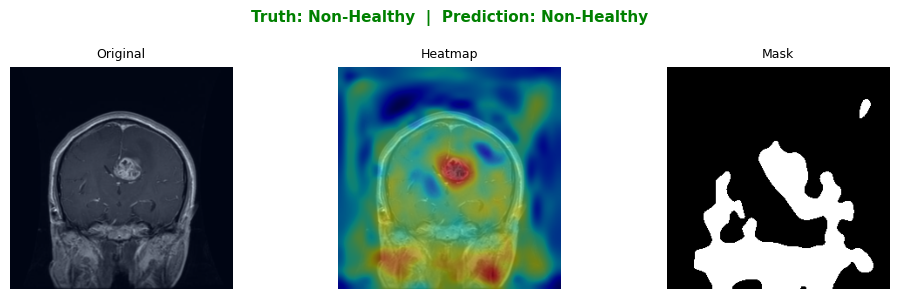

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import random


all_samples = []

for batch in predictions:

    imgs = batch["image"] if isinstance(batch, dict) else batch.image
    masks = batch["pred_mask"] if isinstance(batch, dict) else batch.pred_mask
    amaps = batch["anomaly_map"] if isinstance(batch, dict) else batch.anomaly_map


    if isinstance(batch, dict):
        lbls = batch.get("gt_label", batch.get("label"))
    else:
        lbls = getattr(batch, "gt_label", getattr(batch, "label", None))

    if lbls is None: continue


    for k in range(imgs.shape[0]):
        all_samples.append({
            "image": imgs[k],
            "mask": masks[k],
            "amap": amaps[k],
            "label": lbls[k]
        })


num_to_show = 3
if len(all_samples) < num_to_show: num_to_show = len(all_samples)
selected_samples = random.sample(all_samples, num_to_show)

print(f" Mostro {num_to_show} immagini casuali...")


for sample in selected_samples:


    is_sick_truth = (sample["label"].item() == 1)
    mask_val = sample["mask"].cpu().numpy().squeeze()
    is_sick_pred = (mask_val.max() > 0)


    txt_truth = "Non-Healthy" if is_sick_truth else "Healthy"
    txt_pred = "Non-Healthy" if is_sick_pred else "Healthy"

    colore = "green" if (is_sick_truth == is_sick_pred) else "red"
    titolo = f"Truth: {txt_truth}  |  Prediction: {txt_pred}"


    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    fig.suptitle(titolo, color=colore, fontweight='bold', fontsize=11, y=0.98)


    img = sample["image"].cpu().permute(1, 2, 0).numpy()
    img = (img - img.min()) / (img.max() - img.min())

    axes[0].imshow(img)
    axes[0].axis('off')
    axes[0].set_title("Original", fontsize=9)


    amap = sample["amap"].cpu().numpy().squeeze()
    axes[1].imshow(img, cmap='gray')
    axes[1].imshow(amap, cmap='jet', alpha=0.5)
    axes[1].axis('off')
    axes[1].set_title("Heatmap", fontsize=9)


    axes[2].imshow(mask_val, cmap='gray')
    axes[2].axis('off')
    axes[2].set_title("Mask", fontsize=9)

    plt.tight_layout()
    plt.show()